| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./3_Aprendizaje_Supervisado.ipynb)| [⏩](./5_Aprendizaje_Profundo_(Deep%20Learning).ipynb)|

# **4. Aprendizaje No Supervisado**

## **Agrupamiento (Clustering)**

### **K-means, jerárquico, DBSCAN**

**Agrupamiento (Clustering):**

El agrupamiento es una técnica de aprendizaje no supervisado que tiene como objetivo dividir un conjunto de datos en grupos homogéneos o "clústeres". Los algoritmos de agrupamiento buscan identificar patrones intrínsecos en los datos sin la necesidad de etiquetas previas.

**K-means:**

K-means es uno de los algoritmos de agrupamiento más populares. Su objetivo es dividir el conjunto de datos en $( k )$ clústeres, donde $( k )$ es un parámetro predefinido. El algoritmo minimiza la suma de las distancias al cuadrado entre cada punto de datos y el centroide de su clúster asignado.

**Fórmulas:**

1. **Distancia Euclidiana:**

   $d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}$

2. **Suma de Distancias al Cuadrado (Inercia):**

   $J = \sum_{i=1}^{m} \sum_{j=1}^{k} \Vert \mathbf{x}_i^{(j)} - \mathbf{c}_j \Vert^2$

**Jerárquico:**

Los algoritmos jerárquicos crean una estructura de árbol o dendrograma que representa la relación de agrupamiento entre los datos. Existen dos enfoques: aglomerativo (de abajo hacia arriba) y divisivo (de arriba hacia abajo).

**Fórmulas:**

1. **Distancia entre Clústeres (Linkage):**

   - **Enlace Simple:**

     $d(C_1, C_2) = \min_{\mathbf{a} \in C_1, \mathbf{b} \in C_2} d(\mathbf{a}, \mathbf{b})$

   - **Enlace Complejo:**

     $d(C_1, C_2) = \max_{\mathbf{a} \in C_1, \mathbf{b} \in C_2} d(\mathbf{a}, \mathbf{b})$

   - **Enlace Promedio:**

     $d(C_1, C_2) = \frac{1}{|C_1| \cdot |C_2|} \sum_{\mathbf{a} \in C_1} \sum_{\mathbf{b} \in C_2} d(\mathbf{a}, \mathbf{b})$

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

DBSCAN agrupa los datos basándose en la densidad de puntos. Identifica clústeres como regiones densas separadas por regiones menos densas.

**Fórmulas:**

1. **Vecindad Épsilon:**

   $N_{\varepsilon}(\mathbf{p}) = \{\mathbf{q} \mid d(\mathbf{p}, \mathbf{q}) \leq \varepsilon\}$

2. **Puntos Centrales, de Borde y de Ruido:**

   - **Punto Central:**

     $|N_{\varepsilon}(\mathbf{p})| \geq \text{minPts}$

   - **Punto de Borde:**

     $|N_{\varepsilon}(\mathbf{p})| < \text{minPts}$

   - **Punto de Ruido:**

     $\nexists \, \text{puntos centrales ni de borde en } N_{\varepsilon}(\mathbf{p})$

**Ejemplos en Python:**

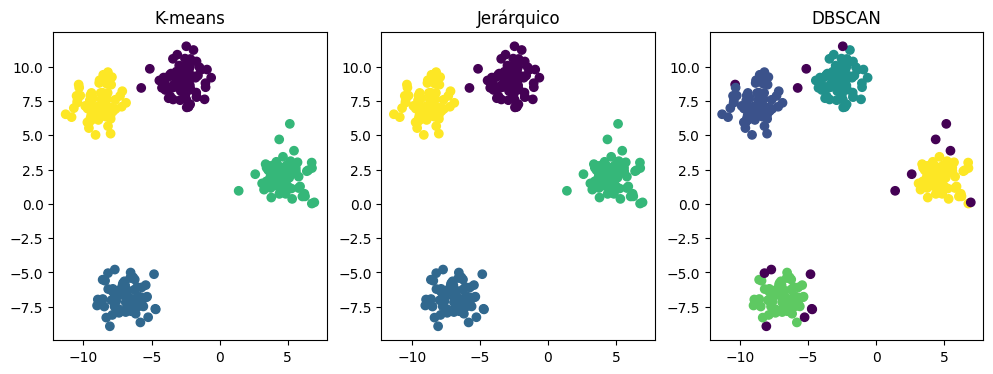

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# K-means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Graficar resultados
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Jerárquico')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

plt.show()

Este código genera datos de ejemplo, aplica los algoritmos de agrupamiento K-means, jerárquico y DBSCAN, y visualiza los resultados en tres subgráficos. Puedes ajustar los parámetros y los datos según tus necesidades.

## **Reducción de Dimensionalidad**

### **Análisis de componentes principales (PCA), t-SNE**

**Fórmula Matemática:**

La transformación lineal en PCA se realiza calculando los vectores propios (eigenvectores) de la matriz de covarianza de los datos.

1. Calcula la matriz de covarianza $(C)$ de los datos originales.
2. Encuentra los eigenvectores y eigenvalores de $(C)$.
3. Ordena los eigenvectores según sus eigenvalores en orden descendente.
4. Elige los primeros $(k)$ eigenvectores para formar la matriz de proyección $(P)$.
5. Proyecta los datos originales $(X)$ en el nuevo espacio de características reducido $(Y)$ utilizando $(Y = X \cdot P)$.

**Explicación Detallada:**

El PCA busca transformar los datos originales en un nuevo conjunto de características que sean ortogonales entre sí y que capturen la mayor varianza de los datos. Esto se logra mediante la identificación de los ejes (eigenvectores) que están asociados con las mayores variabilidades (eigenvalores) en los datos originales.

**Ejemplo en Python:**

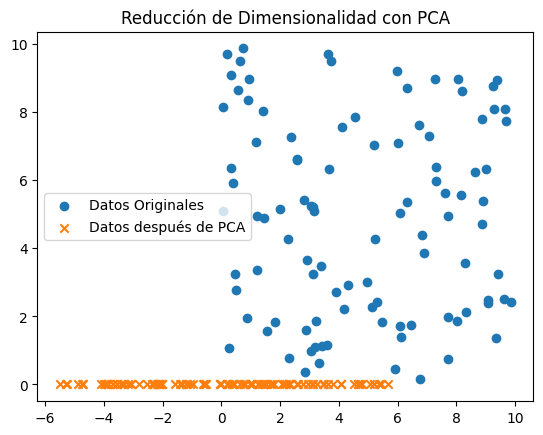

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = np.random.rand(100, 2) * 10

# Aplicar PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Graficar los datos originales y los datos después de PCA
plt.scatter(X[:, 0], X[:, 1], label='Datos Originales')
plt.scatter(X_pca, np.zeros_like(X_pca), label='Datos después de PCA', marker='x')
plt.legend()
plt.title('Reducción de Dimensionalidad con PCA')
plt.show()

**Reducción de Dimensionalidad con t-SNE (t-Distributed Stochastic Neighbor Embedding):**

**Fórmula Matemática:**

El t-SNE busca preservar la similitud entre las instancias durante la reducción de dimensionalidad. Calcula las probabilidades condicionales para que puntos cercanos en el espacio original tengan probabilidades similares en el espacio de menor dimensión.

**Explicación Detallada:**

t-SNE se centra en la preservación de las relaciones de vecindario, es decir, puntos similares en el espacio original deben mantener su similitud en el espacio de menor dimensión. A diferencia de PCA, t-SNE no realiza una transformación lineal, por lo que es más adecuado para capturar estructuras no lineales en los datos.

**Ejemplo en Python:**

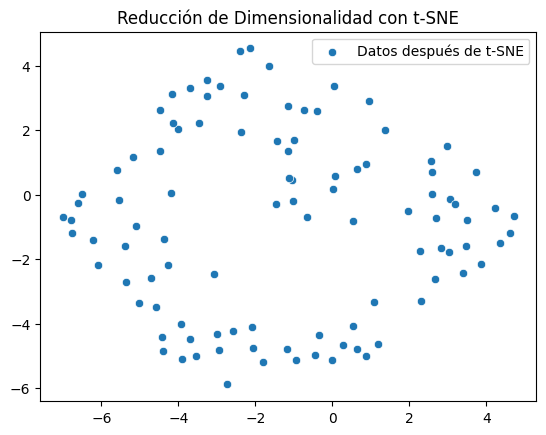

In [4]:
from sklearn.manifold import TSNE
import seaborn as sns

# Generar datos de ejemplo
X = np.random.rand(100, 2) * 10

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Graficar los datos después de t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], label='Datos después de t-SNE')
plt.legend()
plt.title('Reducción de Dimensionalidad con t-SNE')
plt.show()

Ambos métodos de reducción de dimensionalidad son útiles en diferentes contextos y deben elegirse según las características específicas de los datos y los objetivos del análisis.

## **Reglas de Asociación**

### **Apriori, Eclat**

**Reglas de Asociación: Apriori y Eclat**

Las reglas de asociación son utilizadas en minería de datos para descubrir patrones y relaciones entre variables en grandes conjuntos de datos. Dos algoritmos populares para la generación de reglas de asociación son Apriori y Eclat.

**Apriori:**

**Fórmula Matemática:**

La regla de asociación se expresa como $(X \rightarrow Y)$, donde $(X)$ e $(Y)$ son conjuntos de elementos, y la confianza de la regla es calculada como $\text{Confianza}(X \rightarrow Y) = \frac{\text{Soporte}(X \cup Y)}{\text{Soporte}(X)}$.

**Explicación Detallada:**

1. **Soporte:** Mide la frecuencia de aparición de un conjunto de elementos.
2. **Confianza:** Mide la probabilidad de que un conjunto de elementos $(Y)$ esté presente en la transacción dado que $(X)$ también está presente.

**Ejemplo en Python:**

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Datos de ejemplo
data = {'Transaction': [1, 1, 2, 2, 2, 3, 3, 4, 4, 4],
        'Item': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'A', 'B', 'C']}
df = pd.DataFrame(data)

# Convertir la columna 'Item' a formato binario
df_encoded = pd.get_dummies(df, columns=['Item'], prefix='', prefix_sep='')

# Agrupar por transacción y convertir a valores booleanos
df_encoded = df_encoded.groupby('Transaction').max().astype(bool)

# Aplicar algoritmo Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Imprimir reglas
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0         (A)         (B)                 1.0                 1.0      1.0   
1         (B)         (A)                 1.0                 1.0      1.0   
2         (C)         (A)                 0.5                 1.0      0.5   
3         (C)         (B)                 0.5                 1.0      0.5   
4      (A, C)         (B)                 0.5                 1.0      0.5   
5      (C, B)         (A)                 0.5                 1.0      0.5   
6         (C)      (A, B)                 0.5                 1.0      0.5   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   1.0       0.0         inf            0.0  
1         1.0   1.0       0.0         inf            0.0  
2         1.0   1.0       0.0         inf            0.0  
3         1.0   1.0       0.0         inf            0.0  
4         1.0   1.0       0.0         inf            0.0  
5         1.0   1.0  


**Eclat:**

**Fórmula Matemática:**

En Eclat, la confianza se define como $\text{Confianza}(X \rightarrow Y) = \frac{\text{Soporte}(X \cup Y)}{\text{Soporte}(X) \times \text{Soporte}(Y)}$.

**Explicación Detallada:**

Eclat se basa en el concepto de soporte, similar a Apriori, pero no calcula confianza. Eclat es eficiente para conjuntos de datos grandes y para descubrir conjuntos de elementos frecuentes.

**Ejemplo en Python:**

In [13]:
from pyECLAT import ECLAT

# Datos de ejemplo
data = {'Transaction': [1, 1, 2, 2, 2, 3, 3, 4, 4, 4],
        'Item': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'A', 'B', 'C']}
df = pd.DataFrame(data)

# Preprocesamiento para convertir a formato aceptado por pyECLAT
transactions = df.groupby('Transaction')['Item'].apply(list).values.tolist()

# Crear DataFrame de pandas con transacciones
df_transactions = pd.DataFrame(transactions)

# Aplicar algoritmo Eclat
model = ECLAT(df_transactions, verbose=True)
frequent_itemsets = model.fit(min_support=0.2, min_combination=1, max_combination=2)

# Imprimir conjuntos de elementos frecuentes
print(frequent_itemsets)

100%|██████████| 4/4 [00:00<00:00, 241.73it/s]


Combination 1 by 1


3it [00:00, 16.01it/s]


Combination 2 by 2


3it [00:00, 11.08it/s]

({'A': [0, 1, 2, 3], 'C': [1, 3], 'B': [0, 1, 2, 3], 'A & C': [1, 3], 'A & B': [0, 1, 2, 3], 'C & B': [1, 3]}, {'A': 1.0, 'C': 0.5, 'B': 1.0, 'A & C': 0.5, 'A & B': 1.0, 'C & B': 0.5})


Ambos algoritmos son útiles para descubrir patrones de asociación en conjuntos de datos. La elección entre Apriori y Eclat depende de la naturaleza de los datos y los objetivos específicos del análisis.

| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./3_Aprendizaje_Supervisado.ipynb)| [⏩](./5_Aprendizaje_Profundo_(Deep%20Learning).ipynb)|